<a href="https://colab.research.google.com/github/StevenBlaine/MLA_SRB/blob/main/MLA5_SRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 5** #  
**Steven Blaine
<br>CS430-ON
<br>Machine Learning in the Cloud** 

# Problem 1: Land Satellite Random Forest Classification

## Step 1: Imports

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for Specific Models
Imports for Ensemble Learning, Random Forests, and Other Classifiers. 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Confusion Matrix Function
Function for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### Straight Line Plot Function

In [ ]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

### Step 2: Acquire Data (Reading the Data)

In [ ]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')

In [ ]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Step 3: Statistical and Visual Exploration

In [ ]:
landsat_train.describe()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


In [ ]:
landsat_test.describe()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,69.236000,83.017500,99.219000,82.675000,69.020500,82.676000,98.969000,82.534000,68.799000,82.365500,...,82.631000,68.746500,82.505500,98.952500,82.573500,68.573500,82.206000,98.625500,82.330000,3.709500
std,13.510276,23.222249,16.591585,19.343047,13.583127,23.046835,16.748053,19.438796,13.412626,22.967339,...,19.231062,13.402016,22.917604,16.625175,19.276628,13.323076,22.929074,16.772564,19.405318,2.207384
min,39.000000,27.000000,53.000000,34.000000,39.000000,27.000000,53.000000,34.000000,40.000000,27.000000,...,29.000000,40.000000,27.000000,53.000000,34.000000,39.000000,27.000000,56.000000,41.000000,1.000000
25%,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,...,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,2.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,100.000000,81.000000,68.000000,84.500000,...,81.000000,67.500000,84.000000,100.000000,81.000000,68.000000,84.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,112.000000,92.000000,79.000000,100.000000,...,92.000000,79.000000,102.000000,113.000000,92.000000,78.000000,102.000000,113.000000,92.000000,5.000000
max,101.000000,132.000000,139.000000,151.000000,104.000000,126.000000,139.000000,151.000000,101.000000,121.000000,...,151.000000,101.000000,130.000000,139.000000,151.000000,101.000000,127.000000,139.000000,151.000000,7.000000


Bar plots displaying number of land types.

In [ ]:
landsat_train2 = landsat_train.land_type.value_counts()

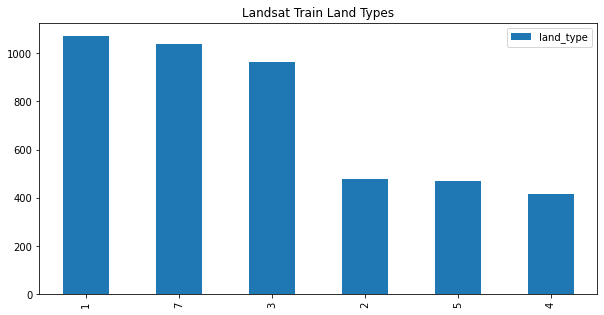

In [ ]:
landsat_train2.plot(kind = 'bar', x = 'land_type', title = 'Landsat Train Land Types', figsize=(10,5)).legend(loc='upper right')

In [ ]:
landsat_test2 = landsat_test.land_type.value_counts()

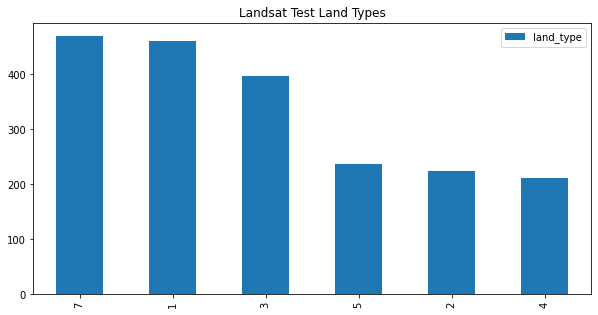

In [ ]:
landsat_test2.plot(kind = 'bar', x = 'land_type', title = 'Landsat Test Land Types', figsize=(10,5)).legend(loc='upper right')

### Step 4: Further Splitting the Data

Creating X DataFrames.

In [ ]:
X_train = landsat_train.iloc[:,0:-1]

In [ ]:
X_test = landsat_test.iloc[:,0:-1]

Creating y DataFrames. 

In [ ]:
y_train = landsat_train[['land_type']]

In [ ]:
y_test = landsat_test[['land_type']]

### Step 5: Building the Pipeline

Creating column transformer that will MinMax scale numerical variables.

In [ ]:
num_attribs = ['top_left_r',
 'top_left_g',
 'top_left_infra1',
 'top_left_infra2',
 'top_middle_r',
 'top_middle_g',
 'top_middle_infra1',
 'top_middle_infra2',
 'top_right_r',
 'top_right_g',
 'top_right_infra1',
 'top_right_infra2',
 'middle_left_r',
 'middle_left_g',
 'middle_left_infra1',
 'middle_left_infra2',
 'central_pixel_r',
 'central_pixel_g',
 'central_pixel_infra1',
 'central_pixel_infra2',
 'middle_right_r',
 'middle_right_g',
 'middle_right_infra1',
 'middle_right_infra2',
 'bottom_left_r',
 'bottom_left_g',
 'bottom_left_infra1',
 'bottom_left_infra2',
 'bottom_middle_r',
 'bottom_middle_g',
 'bottom_middle_infra1',
 'bottom_middle_infra2',
 'bottom_right_r',
 'bottom_right_g',
 'bottom_right_infra1',
 'bottom_right_infra2']

In [ ]:
cat_attribs = ['land_type']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs)], 
                               remainder='passthrough')

Creating pipeline that will transform the data and run a Decision Tree Classification algorithm.


In [ ]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf', RandomForestClassifier(n_estimators=1000, max_samples=4000, bootstrap=True, n_jobs=-1))
                     ])

### Step 6: Executing the Model

In [ ]:
random_forest

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=4000, n_estimators=1000,
                                        n_jobs=-1))])

Running pipeline to fit the Random Forest Classification model.

In [ ]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=4000, n_estimators=1000,
                                        n_jobs=-1))])

### Step 7: Evaluating Model

Running pipeline to predict y values from the test data set and saving them in a variable called y_pred.

In [ ]:
y_pred = random_forest.predict(X_test)

Using classification function to display precision, recall, and F1 scores.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.78      0.64      0.70       211
           5       0.93      0.90      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



Generating heatmap of the confusion matrix.

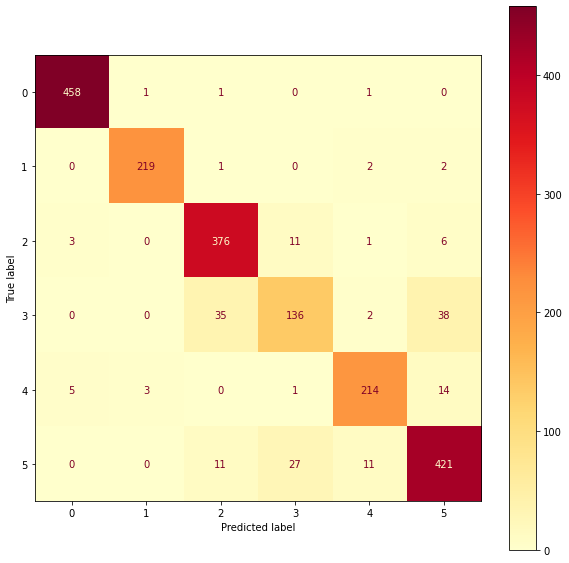

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

### Step 8: Conclusion
The performance measures utilized above show that the Random Forest Classifier is an adequate model for predicting the land type, performing well for most of the types.

# Problem 2: Land Satellite Voting Classifier

### Step 1: Imports (using those imported for Problem 1)

### Step 2: Acquire Data (using that applied in Problem 1)

### Step 3: Visualization (see data set box plots generated above for Problem 1)

### Step 4: Splitting the Data (carrying over Problem 1 splits)

### Step 5: Building the Pipeline

Creating pipeline that will perform Voting Classification.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

In [ ]:
voting = Pipeline([
                     ('transform', col_transform),
                     ('voting_ensemble',VotingClassifier(
                         estimators=[
                                     ('knn',knn),
                                     ('lr',lr),
                                     ('svc',svc)
                                     ], voting='hard'))
                     ])

### Step 6: Executing the Model

Running pipeline to fit the Voting Classification.

In [ ]:
voting.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

### Step 7: Evaluating the Model

Running pipeline to predict y values from the test data set and saving them in a variable called y_pred.

In [ ]:
y_pred = voting.predict(X_test)

Using classification function to display precision, recall, and F1 scores.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.87      0.97      0.91       397
           4       0.71      0.55      0.62       211
           5       0.91      0.86      0.89       237
           7       0.84      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



Generating heatmap of the confusion matrix.

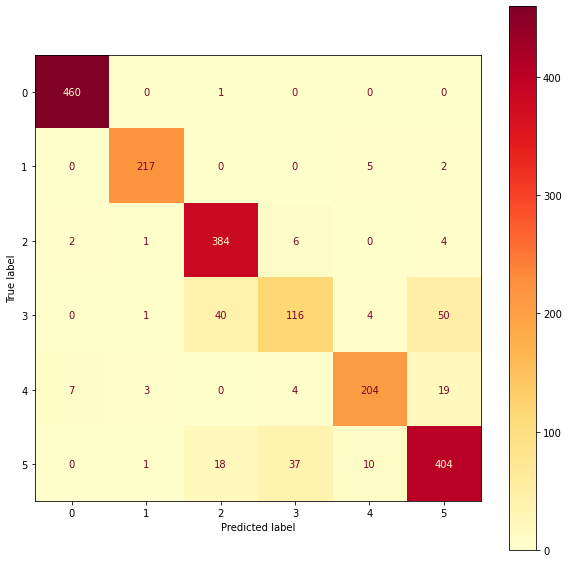

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

### Step 8: Conclusion
Based on the performance measures utilized above, the Voting Classifier model is suitable for predicting land type, performing comparably to the Random Forest Classifier (albeit with a slightly-lower accuracy value).

# Problem 3: Bank Note Random Forest Classifier

### Step 1: Imports (using those imported for Problem 1)

### Step 2: Acquire Data (Reading the Data)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Step 3: Statistical and Visual Exploration

In [ ]:
list(df.columns.values)

['variance', 'skewness', 'curtosis', 'entropy', 'forgery']

Bar plots displaying number of forgery types.

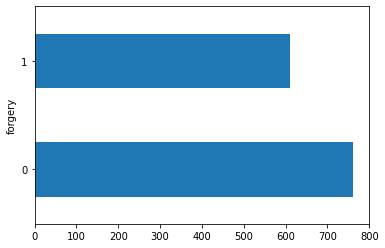

In [ ]:
df.forgery.groupby(df.forgery).count().plot(kind='barh')

### Step 4: Splitting the Data

In [ ]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df[['forgery']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

### Step 5: Building the Pipeline

Creating column transformer that will MinMax scale numerical variables.

In [ ]:
num_attribs=['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs)], 
                               remainder='passthrough')

Creating pipeline that will transform the data and run a Random Forest Classification algorithm.

In [ ]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('rf', RandomForestClassifier(n_estimators=1000, max_samples=1000, bootstrap=True, n_jobs=-1))
                     ])

### Step 6: Executing the Model

Running pipeline to fit the Random Forest model.

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=1000,
                                        n_jobs=-1))])

### Step 7: Evaluating Model

Running pipeline to predict y values from the test data set and saving them in a variable called y_pred.

In [ ]:
y_pred = pipeline.predict(X_test)

Using classification function to display precision, recall, and F1 scores.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Generating heatmap of the confusion matrix.

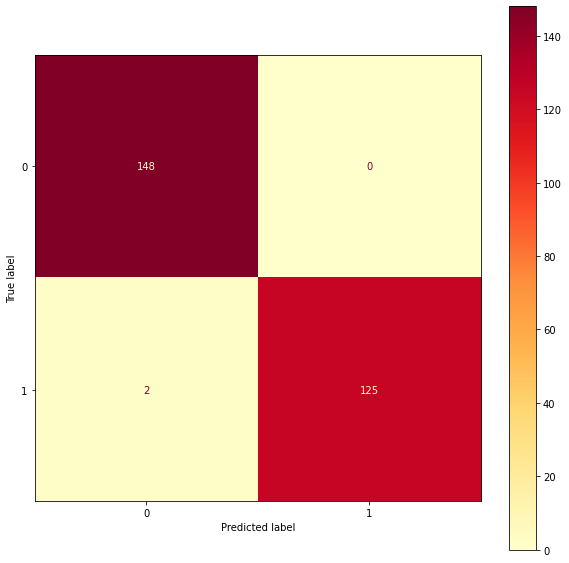

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

### Step 8: Conclusion
The performance measures utilized above show that the Random Forest Classifier is an excellent model for predicting whether a banknote is a forgery.